# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 20 Global Optmization (II)
## 20.1 Many atoms with Lennard Jone potential
We have learned in the previous lecture that the interatomic pair could be described by a simple Lennard Jones formula:

$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$

Suppose we have $N$ atoms to consider, there will be $N\times(N-1)/2$ pairs to consider. For each pair, we need to
calculate the distance $r$, and then evaluate the energy according the LJ formula


In [2]:
import numpy as np

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))
            

In [9]:
#now we can deal with many atoms
pos = init_pos(5)
total_energy(pos)

12.418437797277683

In [10]:
#now we can deal with many atoms
pos = init_pos(5)
total_energy(pos)

-1.2573001035767524

In [3]:
#below are some reference values from Cambridge Cluster database,
#http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html
#please try to download some values from there and check if the results are consistent

#pos =np.array([  -0.3616353090,        0.0439914505,        0.5828840628,
#                  0.2505889242,        0.6193583398,       -0.1614607010,
#                 -0.4082757926,       -0.2212115329,       -0.5067996704,
#                  0.5193221773,       -0.4421382574,        0.08537630870])
pos =np.array([ -0.2604720088,        0.7363147287,        0.4727061929,
                 0.2604716550,       -0.7363150782,       -0.4727063011,
                -0.4144908003,       -0.3652598516,        0.3405559620,
                -0.1944131041,        0.2843471802,       -0.5500413671,
                 0.6089042582,        0.0809130209,        0.2094855133])

#pos = np.array([ 0.7430002202,        0.2647603899,       -0.0468575389,
#                -0.7430002647,       -0.2647604843,        0.0468569750,
#                 0.1977276118,       -0.4447220146,        0.6224700350,
#                -0.1977281310,        0.4447221826,       -0.6224697723,
#                -0.1822009635,        0.5970484122,        0.4844363476,
#                 0.1822015272,       -0.5970484858,       -0.4844360463])
total_energy(pos)

-9.1038524156813647

### Quiz
Any elegant way to download data, and run it directly?

## 20.2 Global optimization on LJ Clusters

Since we now know how to evaluate the energy for LJ clusters with any arbitray number, let's proceed to run global minimizations to find the ground state configurations. Try to compare your results with the Cambridge database, and see if you get the right values.
### 20.2.1 A simple algorithm

In [11]:
from scipy.optimize import minimize

f_values = []
x_values = []
N_attempts = 50
N_atom = 5
for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

print('The global minimum:  ', min(f_values))

step:  0   values: -9.103852415643354
step:  10   values: -9.10385241564008
step:  20   values: -9.103852415610461
step:  30   values: -9.103852415657157
step:  40   values: -9.103852332323926
The global minimum:   -9.103852415706662


### 20.2.1 Statistics
In addition to find the global minimum, we can also do some statistic analysis on the local minimum identified in each system. This could give us some rough ideas about the whole picture, or more precisely, energy landscape.

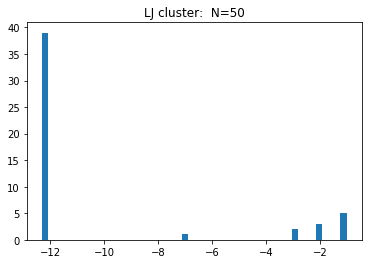

In [5]:
import matplotlib.pyplot as plt
plt.title('LJ cluster:  N='+ str(N_attempts))
plt.hist(f_values,50)
plt.show()

## 20.3 Homework

Try different minimization methods in scipy on larger systems ($N$ up to 20), and show 
- 1 the average number of attempts to find the ground state
- 2 the time costs


### Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution
